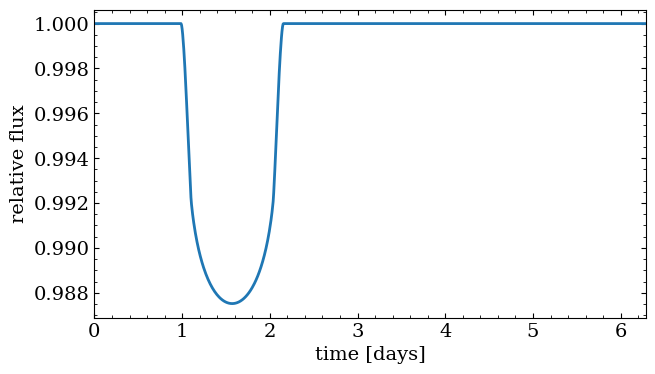

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import exoplanet as xo

# The light curve calculation requires an orbit
orbit = xo.orbits.KeplerianOrbit(period=2*np.pi, omega=0.0, Omega=np.pi, t0=np.pi/2, a=2)

# Compute a limb-darkened light curve using starry
t = np.linspace(0, 2*np.pi, 1000)
u = [0.5, 0.2]
light_curve = (
    xo.LimbDarkLightCurve(*u)
    .get_light_curve(orbit=orbit, r=0.1, t=t)
    .eval()
) + 1
# Note: the `eval` is needed because this is using Theano in
# the background

plt.plot(t, light_curve, color="C0", lw=2)
plt.ylabel("relative flux")
plt.xlabel("time [days]")
_ = plt.xlim(t.min(), t.max())


In [8]:
np.save('xo_flux.npy', light_curve)

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import astropy.units as u
import starry

starry.config.lazy = False
starry.config.quiet = True

/Users/cassese/miniconda3/envs/exoplanet/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


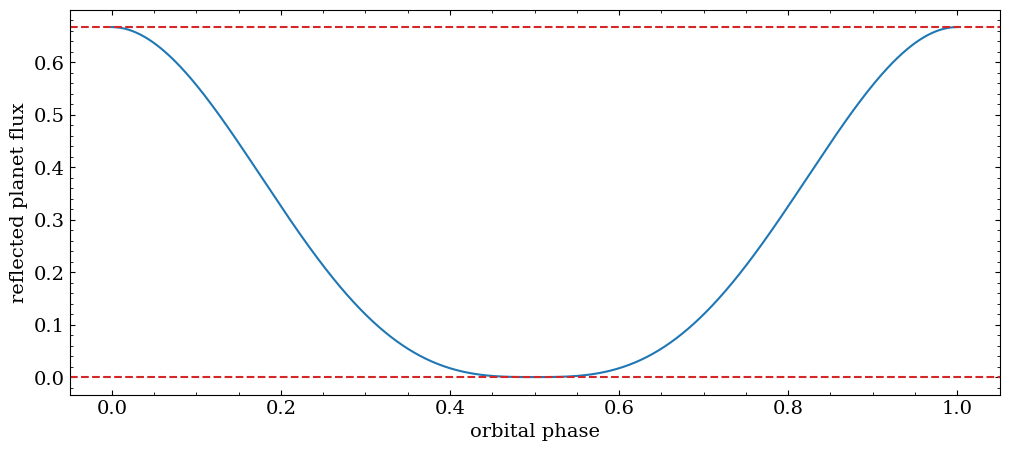

In [3]:
map = starry.Map(ydeg=15, reflected=True)

plt.figure(figsize=(12, 5))
phase = np.linspace(0, 1, 1000)
theta = np.linspace(0, 2 * np.pi, 1000)
plt.plot(phase, map.flux(xs=np.sin(theta), ys=0, zs=np.cos(theta)))
plt.axhline(0, color="C3", ls="--")
plt.axhline(2 / 3, color="C3", ls="--")
plt.xlabel("orbital phase")
plt.ylabel("reflected planet flux");

In [22]:
theta = 2.5 - np.pi/2
print(float(map.flux(xs=np.sin(theta), ys=0, zs=np.cos(theta))))

0.4509807660352008
